(array([ 1899,  1913,  1914, ..., 21494, 21495, 21496]),)


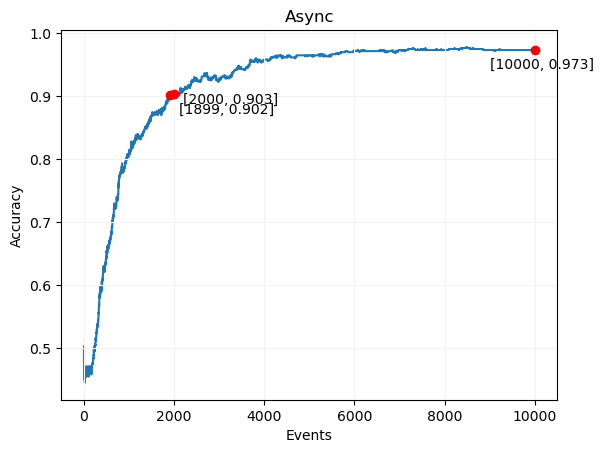

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('/users/yyang22/thesis/aegnn_project/aegnn_results/async_accuracy.csv', delimiter=',')
print(np.where(data[:,1] >= 0.90))
plt.grid(color='0.95')
plt.plot(data[:10000,0], data[:10000,1], zorder=1)

plt.scatter(data[10000,0], data[10000,1], c='r', zorder=2)
anno1 = f'[{data[10000,0]:.0f}, {data[10000,1]:.3f}]'
plt.text(data[10000,0]-1000, data[10000,1]-0.03, anno1, zorder=3)

plt.scatter(data[1899,0], data[1899,1], c='r', zorder=2)
anno2 = f'[{data[1899,0]:.0f}, {data[1899,1]:.3f}]'
plt.text(data[1899,0]+200, data[1899,1]-0.03, anno2, zorder=3)

plt.scatter(data[2000,0], data[2000,1], c='r', zorder=2)
anno3 = f'[{data[2000,0]:.0f}, {data[2000,1]:.3f}]'
plt.text(data[2000,0]+200, data[2000,1]-0.015, anno3, zorder=3)

plt.title("Async")
plt.xlabel("Events")
plt.ylabel("Accuracy")

plt.savefig('/users/yyang22/thesis/aegnn_project/aegnn_results/async_accuracy.png')

tensor([[0, 1, 2, 1, 2, 3, 4, 3, 4, 7, 5, 6, 5, 6, 7, 4, 6, 7],
        [0, 1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7]])
tensor([[0, 1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7],
        [0, 1, 2, 1, 2, 3, 4, 3, 4, 7, 5, 6, 5, 6, 7, 4, 6, 7]])


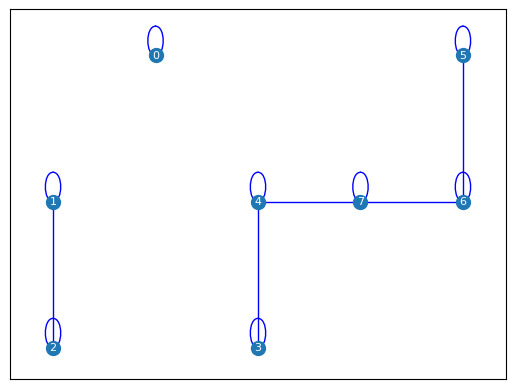

In [6]:
# test radius_graph
import torch
from torch import tensor
import pytorch_lightning as pl
import torch_geometric as pyg
from torch_geometric.nn.pool import radius_graph, radius
from torch_geometric.data import Data

def printg(graph):
    import networkx as nx
    from torch_geometric.utils import to_networkx
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots()
    g_nx = to_networkx(graph, to_undirected=True)
    pos = dict(zip(np.arange(graph.num_nodes),graph.pos.tolist()))
    nx.draw_networkx(g_nx, pos=pos, with_labels=True, ax=ax, node_size=100, node_shape='o',  font_size=8, font_color='w',  edge_color='b', width=1)

def printg_thin(graph):
    import networkx as nx
    from torch_geometric.utils import to_networkx
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots()
    graph.pos = graph.pos[:,:2]
    g_nx = to_networkx(graph, to_undirected=True)
    pos = dict(zip(np.arange(graph.num_nodes),graph.pos.tolist()))
    nx.draw_networkx(g_nx, pos=pos, with_labels=False, ax=ax, node_size=1, node_shape='o',  font_size=8, font_color='w',  edge_color='b', width=1)
    # nx.draw_networkx(g_nx, with_labels=False, ax=ax, node_size=1, node_shape='o',  font_size=8, font_color='w',  edge_color='b', width=1)


device = 'cpu'
graph = Data(
    x = torch.tensor([1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], device=device).view(-1,1),
    pos = torch.tensor([[2,3],[1,2],[1,1],[3,1],[3,2],[5,3],[5,2],[4,2]], device=device, dtype=torch.float)
)

edge_index_from_rg = radius_graph(graph.pos[:,:], r=1.1, max_num_neighbors=3, loop=True)
graph.edge_index = edge_index_from_rg
neighs = radius(graph.pos[:,:], graph.pos[:,:], r=1.1, max_num_neighbors=7)

print(edge_index_from_rg)
print(neighs)

printg(graph)


  0%|          | 10/2439 [00:00<03:26, 11.77it/s]


0    73.0
dtype: float64


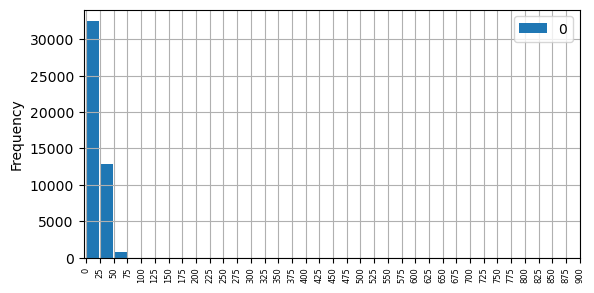

In [5]:
import torch
from torch import tensor
import torch_geometric
from torch_geometric.data import Data
from torch_geometric.utils import degree
import pandas as pd
import aegnn
from tqdm import tqdm

device = 'cpu'

data_module = aegnn.datasets.NCars(batch_size=1, shuffle=False)
data_module.setup()
data_loader = data_module.val_dataloader(num_workers=16).__iter__()

ds = []
for i, sample in enumerate(tqdm(data_loader)):
    if i==10: break
    ds.append(degree(sample.edge_index[0,:]))
final_ds = torch.cat(ds).tolist()
ds_pd = pd.DataFrame(final_ds)



import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np

max = ds_pd.max()
print(max)
step = 25


range = np.arange(stop=895, step=step)
ds_pd.plot.hist(grid=True, bins=range, rwidth=0.9, align='mid')
x_major_locator = MultipleLocator(step)
ax = plt.gca()
plt.xticks(rotation=90, size=6)
ax.set_box_aspect(0.5)
ax.set_xlim((-5,900))
ax.xaxis.set_major_locator(x_major_locator)

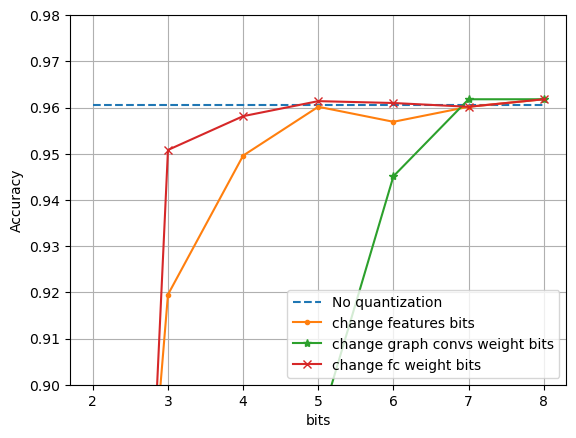

In [7]:
import matplotlib.pyplot as plt

x = [2,3,4,5,6,7,8]
std = [0.9605691056910569, 0.9605691056910569, 0.9605691056910569, 0.9605691056910569, 0.9605691056910569, 0.9605691056910569, 0.9605691056910569]
qx = [0.7227642276422764, 0.9195121951219513, 0.9495934959349593, 0.9601626016260163, 0.9569105691056911, 0.9601626016260163, 0.9617886178861789]
qconvw = [0.4739837398373984, 0.7223577235772358, 0.8951219512195122, 0.8902439024390244, 0.9451219512195121, 0.9617886178861789, 0.9617886178861789]
qfcw = [0.598780487804878, 0.9508130081300813, 0.958130081300813, 0.9613821138211383, 0.9609756097560975, 0.9601626016260163, 0.9617886178861789]

fig, ax = plt.subplots()
ax.plot(x,std,label='No quantization', linestyle='--')
ax.plot(x,qx,label='change features bits', marker='.')
ax.plot(x,qconvw,label='change graph convs weight bits', marker='*')
ax.plot(x,qfcw,label='change fc weight bits', marker='x')
ax.set_xlabel('bits')
ax.set_ylabel('Accuracy')
ax.set_ylim((0.9,0.98))
ax.legend()
plt.grid()
plt.show()

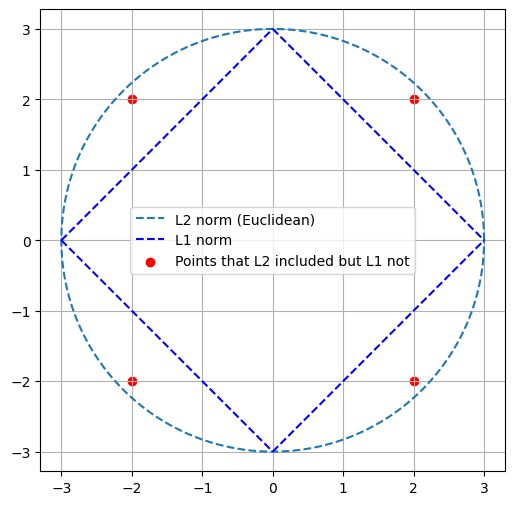

In [8]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2 * np.pi, 200)
cx = 3*np.cos(theta)
cy = 3*np.sin(theta)

x1 = np.linspace(0,3,200)
x2 = np.linspace(-3,0,200)
y1 = 3-x1
y2 = -3+x1
y3 = 3+x2
y4 = -3-x2

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(cx, cy, label='L2 norm (Euclidean)', linestyle='--')

ax.plot(x1, y1, color = 'b', linestyle='--', label='L1 norm', )
ax.plot(x1, y2, color = 'b', linestyle='--')
ax.plot(x2, y3, color = 'b', linestyle='--')
ax.plot(x2, y4, color = 'b', linestyle='--')


ax.scatter([2,2,-2,-2], [2,-2,2,-2], color = 'r', label='Points that L2 included but L1 not')
ax.axis("equal")
ax.legend()
plt.grid()
plt.xticks([-3,-2,-1,0,1,2,3])
plt.yticks([-3,-2,-1,0,1,2,3])
plt.show()
